In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import torch
import pickle
import numpy as np
from collections import Counter
import glob
import collections
# read top neurons
import yaml 
import sys  
sys.path.append('../')
from my_package.cma import get_topk
import os


/tmp/ipykernel_184404/3195766934.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import seaborn as sns
import pandas as pd 
top_neuron_path = '../../pickles/top_neurons/'
masking_mode = 'percent'
key = 0.05
data = {}
df = {}

/tmp/ipykernel_184404/3487926593.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Treatments", style="Treatments", palette=['red', 'green', 'blue'], ci=None)


[None, None]

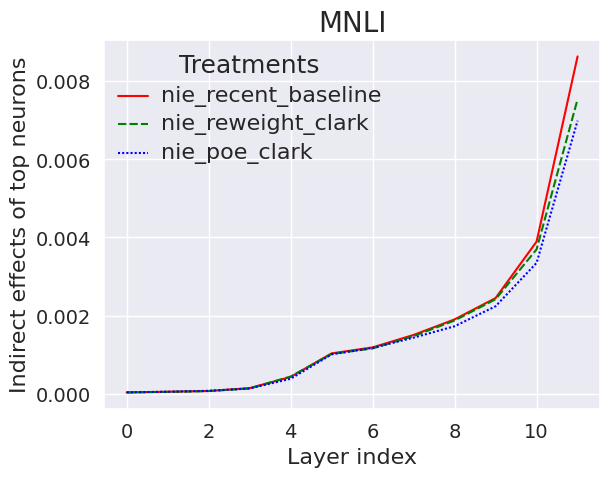

In [4]:
x = []
y = []
y_nie = {}
line_type = []
top_neurons = {}
current_dataset = 'MNLI'
method_names = ['nie_recent_baseline', 'nie_reweight_clark', 'nie_poe_clark']
interventions = ['High-overlap','High-overlap', 'High-overlap']


for method_name, intervention in zip(method_names, interventions):
    dir_path = os.path.join(top_neuron_path, method_name)
    
    if method_name not in y_nie.keys(): y_nie[method_name] = {}
    for seed in [1548, 3099, 3785, 3990, 409]:
        path = os.path.join(dir_path, f'top_neuron_layer_each_{seed}_{masking_mode}_{intervention}_all_layers.pickle')
        with open(path, 'rb') as handle: top_neurons[intervention] = pickle.load(handle)
        for layer in top_neurons[intervention][key].keys():   
            if layer not in y_nie[method_name].keys(): y_nie[method_name][layer] = []
            y_nie[method_name][layer].append(torch.Tensor([float(nie) for pos, nie in top_neurons[intervention][key][layer].items()]))
    


for method_name, intervention in zip(method_names, interventions):
    for layer in y_nie[method_name].keys():
        y_nie[method_name][layer] = torch.stack(y_nie[method_name][layer])  
        y_nie[method_name][layer] = torch.mean(y_nie[method_name][layer], dim=0 ).tolist()
   
        x.extend([layer] * len(y_nie[method_name][layer]))
        y.extend(y_nie[method_name][layer])
        line_type.extend([method_name] * len(y_nie[method_name][layer]))

data = {'Layer index': x,
        'Indirect effects of top neurons':  y,
         'Treatments': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Treatments", style="Treatments", palette=['red', 'green', 'blue'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

/tmp/ipykernel_184404/332742182.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Treatments", style="Treatments", palette=['red', 'green', 'blue'], ci=None)


[None, None]

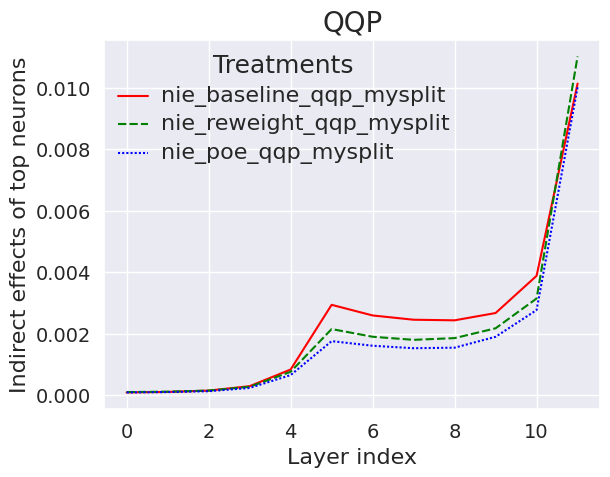

In [5]:
current_dataset = 'QQP'

x = []
y = []
y_nie = {}
line_type = []
top_neurons = {}
method_names = ['nie_baseline_qqp_mysplit', 'nie_reweight_qqp_mysplit', 'nie_poe_qqp_mysplit']
interventions = ['High-overlap','High-overlap', 'High-overlap']

for method_name, intervention in zip(method_names, interventions):
    dir_path = os.path.join(top_neuron_path, method_name)
    
    if method_name not in y_nie.keys(): y_nie[method_name] = {}
    for seed in [1548, 3099, 3785, 3990, 409]:
        path = os.path.join(dir_path, f'top_neuron_layer_each_{seed}_{masking_mode}_{intervention}_all_layers.pickle')
        with open(path, 'rb') as handle: top_neurons[intervention] = pickle.load(handle)
        for layer in top_neurons[intervention][key].keys():   
            if layer not in y_nie[method_name].keys(): y_nie[method_name][layer] = []
            y_nie[method_name][layer].append(torch.Tensor([float(nie) for pos, nie in top_neurons[intervention][key][layer].items()]))
    


for method_name, intervention in zip(method_names, interventions):
    for layer in y_nie[method_name].keys():
        y_nie[method_name][layer] = torch.stack(y_nie[method_name][layer])  
        y_nie[method_name][layer] = torch.mean(y_nie[method_name][layer], dim=0 ).tolist()
   
        x.extend([layer] * len(y_nie[method_name][layer]))
        y.extend(y_nie[method_name][layer])
        line_type.extend([method_name] * len(y_nie[method_name][layer]))

data = {'Layer index': x,
        'Indirect effects of top neurons':  y,
         'Treatments': line_type}

df = pd.DataFrame(data=data) 
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=df, x="Layer index", y="Indirect effects of top neurons",  hue="Treatments", style="Treatments", palette=['red', 'green', 'blue'], ci=None)
plt.xlabel('Layer index', fontsize=16);
plt.ylabel('Indirect effects of top neurons', fontsize=16);
plt.title(f'{current_dataset}', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
# plt.legend(fontsize='x-large', title_fontsize='40')
plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title